# Implementation of Independent 

## Import packages


In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from tqdm.notebook import tqdm

https://towardsdatascience.com/separating-mixed-signals-with-independent-component-analysis-38205188f2f4

## Generate the source $S$

$S\in R^d$

Here we choose 3 sources of signals: sine, sawtooth and noise.

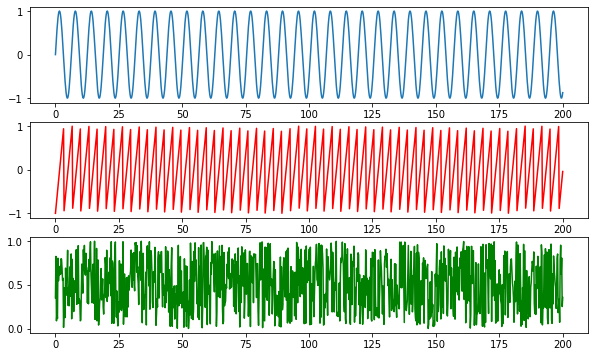

In [205]:
f = plt.figure(figsize = (10,6))
ax = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)
t = np.linspace(0, 200 , 1000)
sine = np.sin(t)
sawtooth = signal.sawtooth(t*1.9)
noise = np.random.random(len(t))

ax.plot(t, sine)
ax2.plot(t, sawtooth, 'r')
ax3.plot(t, noise, 'g')
plt.show()

In [208]:
S = np.vstack((sine, sawtooth, noise))
S.shape

(3, 1000)

## Mixture Matrix A, $x = As$

$s_j^{(i)} = w_j^Tx^{(i)}$

$x^{(i)} = As^{(i)}$

In [209]:
A = np.array([
  [0.5,1,0.2],
  [1,0.5,0.4],
  [0.5,0.8,1]
])

In [273]:
W = np.linalg.inv(A)
W

array([[-0.3       ,  1.4       , -0.5       ],
       [ 1.33333333, -0.66666667,  0.        ],
       [-0.91666667, -0.16666667,  1.25      ]])

In [220]:
X = np.dot(A.T, S)

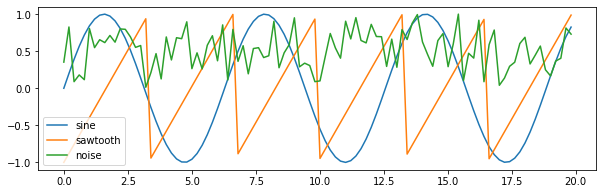

In [271]:
plt.figure(figsize=(10,3))
plt.plot(t[:100], sine[:100])
plt.plot(t[:100], sawtooth[:100])
plt.plot(t[:100], noise[:100])
plt.legend(labels = ["sine", "sawtooth", "noise"])

plt.show()

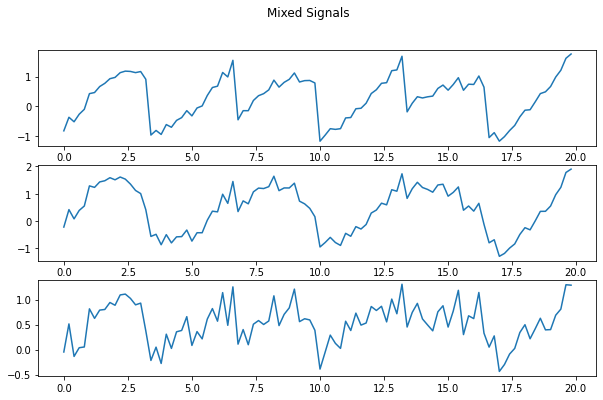

In [272]:
f = plt.figure(figsize=(10,6))
f.suptitle("Mixed Signals")
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

ax1.plot(t[:100], X[0][:100])
ax2.plot(t[:100], X[1][:100])
ax3.plot(t[:100], X[2][:100])

plt.show()

## ICA Algorithm

In [253]:
# https://towardsdatascience.com/separating-mixed-signals-with-independent-component-analysis-38205188f2f4
def center(x):
  return x - np.mean(x, axis=1, keepdims=True), np.mean(x, axis=1, keepdims=True)

def covariance(x):
  mean = np.mean(x, axis=1, keepdims=True)
  n = np.shape(x)[1] - 1
  m = x - mean
  return m.dot(m.T) / n

In [235]:
# https://towardsdatascience.com/separating-mixed-signals-with-independent-component-analysis-38205188f2f4
def whiten(x):
  cov = covariance(x)
  U,S,V = np.linalg.svd(cov)
  d = np.diag(1 / np.sqrt(S))
  whiteM = np.dot(U, np.dot(d, U.T))
  Xw = np.dot(whiteM, X)
  return Xw, whiteM

In [236]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [263]:
def update(W, xi, lr):
  """
  Stochastic gradient ascent, one point xi
  """
  gradient = np.dot((1 - 2 * sigmoid(np.dot(W.T, xi))), xi.T) + np.linalg.inv(W.T)
  diff = np.abs(gradient).sum()

  return W + lr*gradient, diff

In [309]:
def optimize(X, S, lr=0.1, thresh=1e-2, iterations=1000000):
  d, n = S.shape
  W = np.random.random(size=(d,d))
  for c in tqdm(range(iterations)):
    xi = X[:,np.random.randint(0,n-1)]
    W, diff = update(W, xi, lr)
    if (diff < thresh):
      break
  return W


In [310]:
Xc, meanX = center(X)
Xw, whiteM = whiten(Xc)

W_ = optimize(Xw,S)
unMixed = Xw.T.dot(W_.T)
unMixed = (unMixed.T - meanX)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


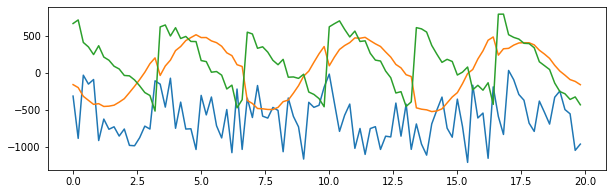

In [312]:
plt.figure(figsize=(10,3))
plt.plot(t[:100], unMixed[0][:100])
plt.plot(t[:100], unMixed[1][:100])
plt.plot(t[:100], unMixed[2][:100])

plt.show()

## Remark 

The ICA ambiguities tells us that **there is no way to recover the scaling of the wi's**

In [318]:
!jupyter nbconvert ICA.ipynb --to markdown ICA.md

[NbConvertApp] WARNING | pattern u'ICA.md' matched no files
[NbConvertApp] Converting notebook ICA.ipynb to markdown
[NbConvertApp] Support files will be in ICA_files/
[NbConvertApp] Making directory ICA_files
[NbConvertApp] Making directory ICA_files
[NbConvertApp] Making directory ICA_files
[NbConvertApp] Making directory ICA_files
[NbConvertApp] Writing 3608 bytes to ICA.md
